# Using Twitter to Predict National Flu Outbreaks

In [1]:
import pandas as pd
from nltk.corpus import stopwords
import numpy as np
import string 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TweetTokenizer, word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence, TaggedDocument
import multiprocessing
from sklearn import utils
from pandas.tools.plotting import lag_plot, autocorrelation_plot
from pandas import concat
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AR
from datetime import datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import statsmodels.api as sm  
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import annotated data
df = pd.read_csv('annotated_tweets.csv', engine='python')
df = df.drop('Unnamed: 0', axis=1)

# Natural Language Processing

In [3]:
def tokenize(tweet):
    tknzr = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)
    return tknzr.tokenize(tweet)

def classifiers(x_train, y_train):
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    log = LogisticRegression()
    log.fit(x_train, y_train)
    forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
    forest.fit(x_train, y_train)
    gradboost = GradientBoostingClassifier(random_state = 123, max_depth = 5, learning_rate = 0.01)
    gradboost.fit(x_train, y_train)
    adaboost = AdaBoostClassifier(n_estimators=100)
    adaboost.fit(x_train, y_train)
    svm = SVC(kernel='linear', probability=True)
    svm.fit(x_train, y_train)
    return [nb, log, forest, gradboost, adaboost, svm]

def classifier_performance(vectorizer, train_data, test_data, y_test):
    accuracy_df = []
    x_train = vectorizer.fit_transform(train_data)
    x_test = vectorizer.transform(test_data)
    #instantiate classifier objects
    classifier_list = classifiers(x_train, y_train)
    #display accuracy dataframe
    for classifier in classifier_list:
        preds = classifier.predict(x_test)
        accuracy = accuracy_score(y_test, preds)
        accuracy_df.append(accuracy*100)
    accuracy_df = pd.DataFrame(accuracy_df)
    classifiers_key = ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'Gradient Boost', 'Adaboost',
                      'Support Vector Machine']
    accuracy_df['Model']=classifiers_key
    accuracy_df.rename(columns={0: 'Accuracy'}, inplace=True)
    fin_accuracy_df = accuracy_df[['Model', 'Accuracy']]
    return fin_accuracy_df

In [4]:
data = df['text']
labels = df['status']
train_data, test_data, y_train, y_test = train_test_split(data, labels)
tfidfvec = TfidfVectorizer(stop_words='english', tokenizer=tokenize)
tfidfvec2 = TfidfVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,2))
tfidfvec3 = TfidfVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,3))
countvec = CountVectorizer(stop_words='english', tokenizer=tokenize)
countvec2 = CountVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,2))
countvec3 = CountVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,3))

## Count Vectorization

**Unigram**

In [5]:
classifier_performance(countvec, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,71.889401
1,Logistic Regression,70.322581
2,Random Forest,57.050691
3,Gradient Boost,62.672811
4,Adaboost,70.230415
5,Support Vector Machine,67.465438


**Bigram**

In [6]:
classifier_performance(countvec2, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,72.442396
1,Logistic Regression,71.520737
2,Random Forest,56.589862
3,Gradient Boost,62.027650
4,Adaboost,70.599078
5,Support Vector Machine,70.599078


**Trigram**

In [7]:
classifier_performance(countvec3, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,72.350230
1,Logistic Regression,71.889401
2,Random Forest,56.589862
3,Gradient Boost,61.935484
4,Adaboost,70.138249
5,Support Vector Machine,70.138249


## TF-IDF Vectorization

**Unigram**

In [8]:
classifier_performance(tfidfvec, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,72.073733
1,Logistic Regression,70.875576
2,Random Forest,57.142857
3,Gradient Boost,61.658986
4,Adaboost,69.400922
5,Support Vector Machine,69.677419


**Bigram**

In [9]:
classifier_performance(tfidfvec2, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,71.889401
1,Logistic Regression,71.428571
2,Random Forest,56.682028
3,Gradient Boost,62.119816
4,Adaboost,68.847926
5,Support Vector Machine,71.797235


**Trigram**

In [10]:
classifier_performance(tfidfvec3, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,72.165899
1,Logistic Regression,70.414747
2,Random Forest,56.589862
3,Gradient Boost,62.211982
4,Adaboost,68.571429
5,Support Vector Machine,72.073733


In [11]:
#store in metrics dataframe
metrics_df = classifier_performance(tfidfvec2, train_data, test_data, y_test)
#add shallow learning metrics too 
metrics_df.to_csv('metrics_df.csv')

# Feature Importance

In [12]:
def top_feature_extraction(vectorizer, num_features):
    unrelated_doc_matrix = vectorizer.transform(df[df.status == 0].text)
    related_doc_matrix = vectorizer.transform(df[df.status == 1].text)
    unrelated_tf = np.sum(unrelated_doc_matrix,axis=0)
    related_tf = np.sum(related_doc_matrix,axis=0)
    unrelated = np.squeeze(np.asarray(unrelated_tf))
    related = np.squeeze(np.asarray(related_tf))
    term_freq_df = pd.DataFrame([unrelated,related],columns=vectorizer.get_feature_names()).transpose()
    term_freq_df.columns = ['unrelated', 'related']
    term_freq_df['total'] = term_freq_df['unrelated'] + term_freq_df['related']
    display(term_freq_df.sort_values(by='total', ascending=False).iloc[:num_features])
    return term_freq_df

In [13]:
def plot_most_predictive_features(vectorizer):
    x_train = vectorizer.fit_transform(train_data)
    x_test = vectorizer.transform(test_data)
    chi2score = chi2(x_train, y_train)[0]

    plt.figure(figsize=(15,10))
    wscores = list(zip(vectorizer.get_feature_names(), chi2score))
    wchi2 = sorted(wscores, key=lambda x:x[1])
    topchi2 = list(zip(*wchi2[-20:]))
    x = range(len(topchi2[1]))
    labels = topchi2[0]
    plt.barh(x,topchi2[1], align='center', alpha=0.2)
    plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
    plt.yticks(x, labels)
    plt.xlabel('$\chi^2$')
    plt.title('Most predictive features and associated Chi-square scores')

# Exploratory Data Analysis

## Class Distribution

No handles with labels found to put in legend.


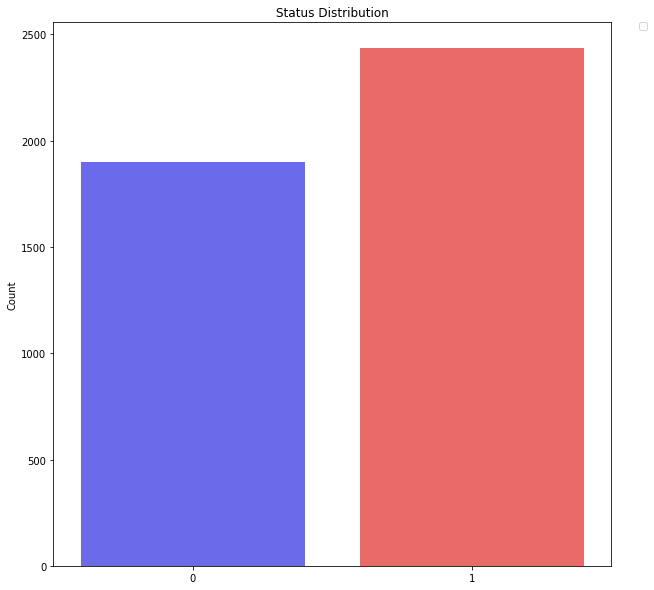

In [14]:
#distribution of annotated dataset (0/1)
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(x="status", data=df, palette='seismic')
ax.set_title('Status Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# In-Depth Classifier Performance

In [15]:
def print_metrics(model, x_test, y_test):
    preds = model.predict(x_test)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    print("Accuracy Score for model: {:.4}%".format(accuracy * 100))
    print("Precision Score for model: {:.4}%".format(precision * 100))
    print("Recall Score for model: {:.4}%".format(recall * 100))
    print("F1 Score for model: {:.4}%".format(f1 * 100))
    return accuracy, precision, recall, f1
    

def cm_plot(labels, predictions, normalize=False, cmap='Spectral'):
    cm = confusion_matrix(labels, predictions)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, ['POS', 'NEG'], ['POS', 'NEG'])
    sns.heatmap(df_cm, annot=True, annot_kws={'size':16}, fmt='g', cmap=cmap)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#     plt.colorbar()
    plt.show()

def plot_roc_curve(labels, predictions, y_score):
    fpr, tpr, thresholds = roc_curve(labels, y_score)
    print('AUC: {}'.format(auc(fpr, tpr)))
    #Seaborns Beautiful Styling
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    plt.figure(figsize=(10,8))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [16]:
x_train = tfidfvec2.fit_transform(train_data)
x_test = tfidfvec2.transform(test_data)

## Naive Bayes

Accuracy Score for model: 71.89%
Precision Score for model: 69.69%
Recall Score for model: 86.41%
F1 Score for model: 77.15%


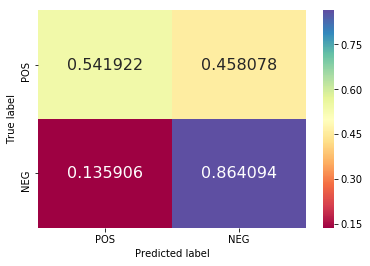

AUC: 0.7981979385405087


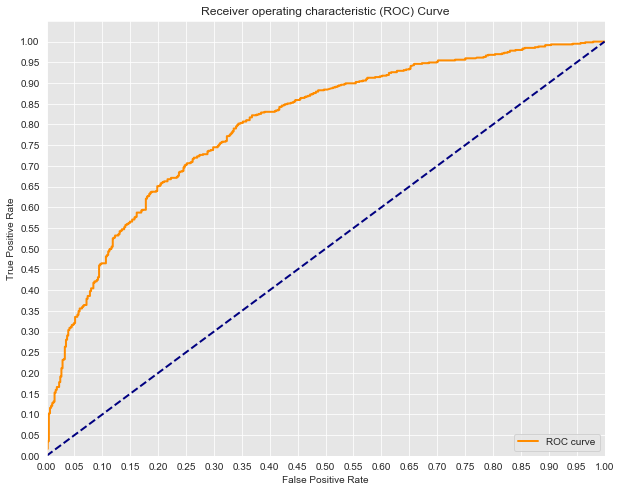

In [17]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
preds = nb.predict(x_test)
y_score = nb.predict_proba(x_test)

print_metrics(nb,x_test,y_test)
cm_plot(y_test,preds, normalize=True, cmap='Spectral')
plot_roc_curve(y_test,preds, y_score[:,1])

## Logistic Regression

### Hyperparameter Tuning

**L1 vs. L2 Regularization**

AUC for l1: 0.7702200079603628
AUC for l2: 0.7969798657718121


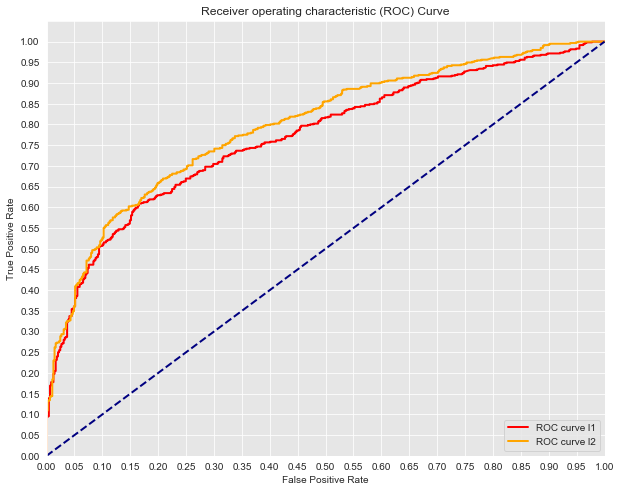

In [18]:
#compare L1 & L2 regularization
penalties = ['l1', 'l2']
colors = ['r', 'orange']

plt.figure(figsize=(10,8))

for n, pen in enumerate(penalties):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, penalty=pen) #Starter code
    model_log = logreg.fit(x_train, y_train)
    #Predict
    y_hat_test = logreg.predict(x_test)
    y_score = logreg.fit(x_train, y_train).decision_function(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('AUC for {}: {}'.format(str(pen), auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(pen))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Class Weights**

AUC for balanced: 0.7945334266617257
AUC for None: 0.7969798657718121


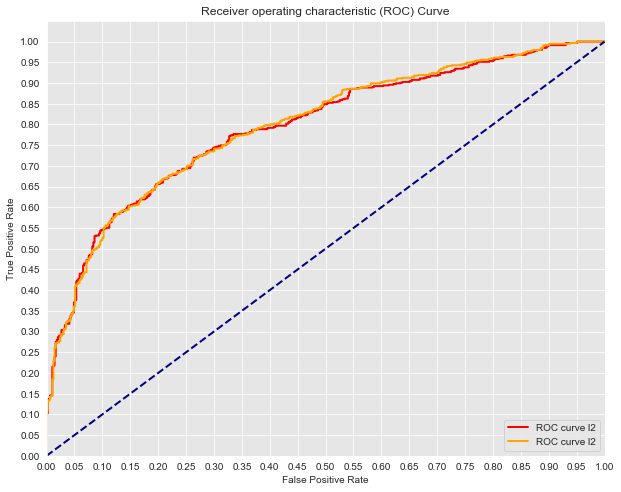

In [19]:
wgts = ['balanced', None]
colors = ['r', 'orange']

plt.figure(figsize=(10,8))

for n, wgt in enumerate(wgts):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, class_weight=wgt) #Starter code
    model_log = logreg.fit(x_train, y_train)
    #Predict
    y_hat_test = logreg.predict(x_test)
    y_score = logreg.fit(x_train, y_train).decision_function(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('AUC for {}: {}'.format(str(wgt), auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(pen))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy Score for model: 71.43%
Precision Score for model: 72.0%
Recall Score for model: 78.52%
F1 Score for model: 75.12%


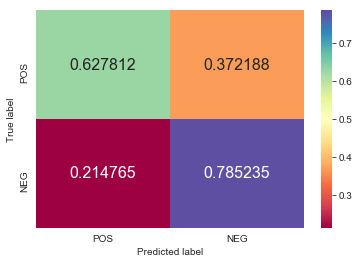

AUC: 0.7936824913190871


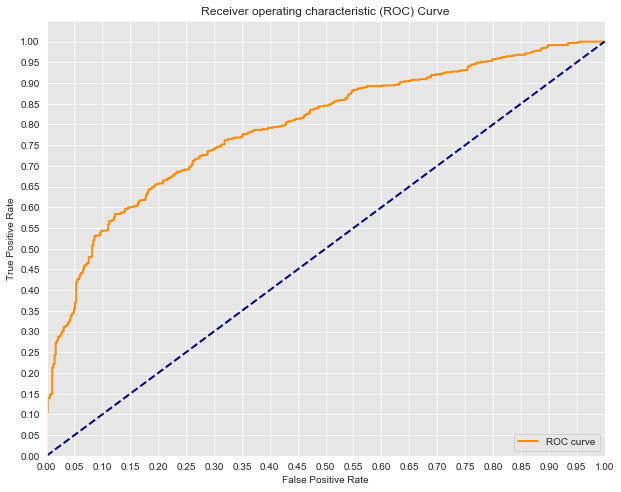

In [20]:
log = LogisticRegression()
log = log.fit(x_train, y_train)
preds = log.predict(x_test)
y_score = log.decision_function(x_test)

print_metrics(log,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds,y_score)

## Random Forest

Accuracy Score for model: 57.05%
Precision Score for model: 56.19%
Recall Score for model: 98.99%
F1 Score for model: 71.69%


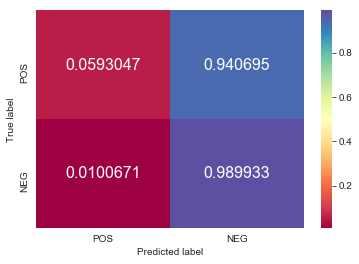

AUC: 0.7549031717928658


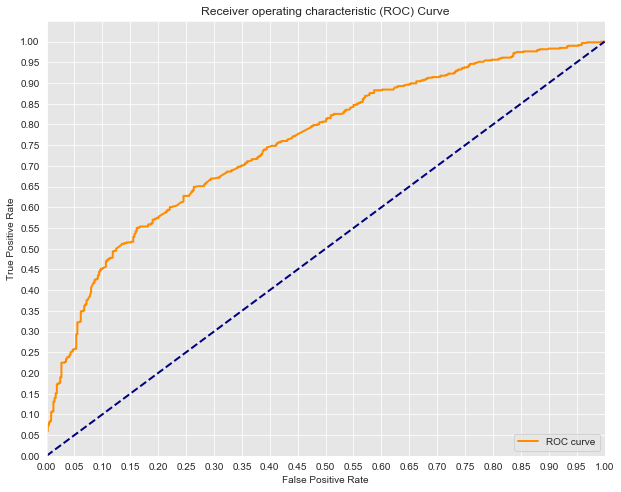

In [21]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(x_train, y_train)
preds = forest.predict(x_test)
y_score = forest.predict_proba(x_test)

print_metrics(forest,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds,y_score[:,1])

## Gradient Boost

Accuracy Score for model: 62.12%
Precision Score for model: 60.52%
Recall Score for model: 89.26%
F1 Score for model: 72.14%


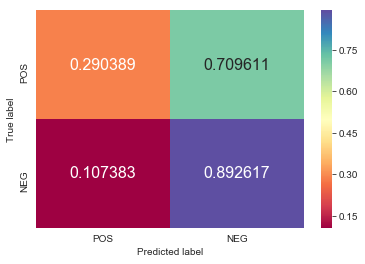

AUC: 0.7229930964439137


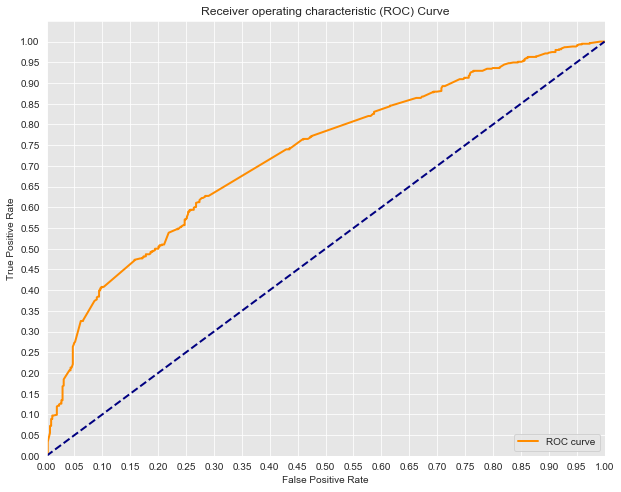

In [22]:
#adjust learning rate
gradboost = GradientBoostingClassifier(random_state = 123, max_depth = 5, learning_rate = 0.01)
gradboost.fit(x_train, y_train)
preds = gradboost.predict(x_test)
y_score = gradboost.predict_proba(x_test)

print_metrics(gradboost,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds,y_score[:,1])

## Adaboost

Accuracy Score for model: 68.76%
Precision Score for model: 71.31%
Recall Score for model: 72.15%
F1 Score for model: 71.73%


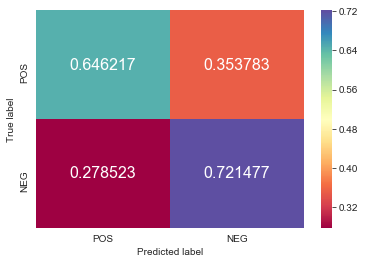

AUC: 0.7525802555550981


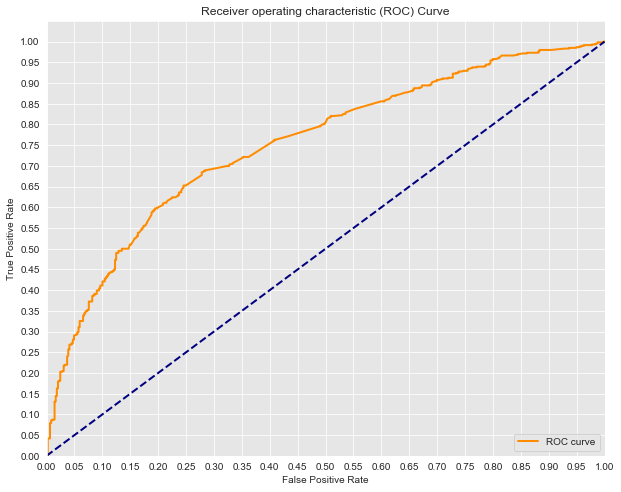

In [23]:
adaboost = AdaBoostClassifier(n_estimators=100)
adaboost.fit(x_train, y_train)
preds = adaboost.predict(x_test)
y_score = adaboost.predict_proba(x_test)

print_metrics(adaboost,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds,y_score[:,1])

## Support Vector Machine

Accuracy Score for model: 71.8%
Precision Score for model: 73.62%
Recall Score for model: 75.84%
F1 Score for model: 74.71%


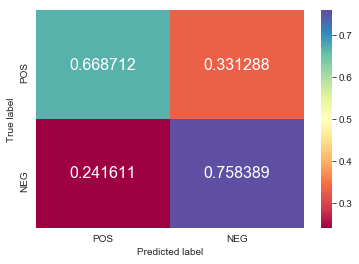

AUC: 0.7863054308889531


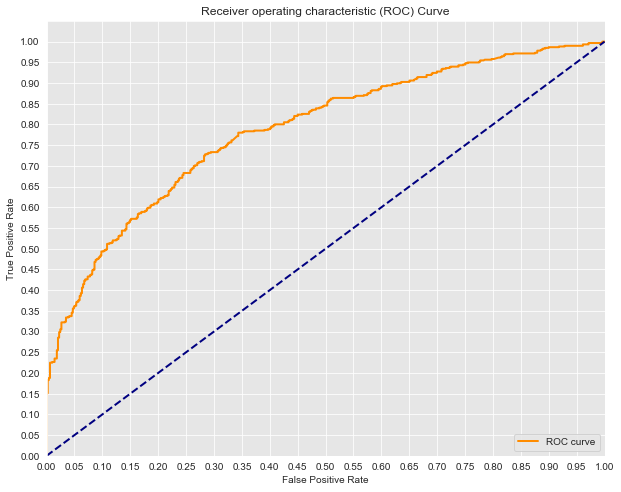

In [24]:
svm = SVC(kernel='linear', probability=True)
svm = svm.fit(x_train, y_train) 
preds = svm.predict(x_test)
y_score = svm.predict_proba(x_test)

print_metrics(svm,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds, y_score[:,1])

## Classifier Comparison

In [25]:
metrics_df = classifier_performance(tfidfvec2, train_data, test_data, y_test)

In [26]:
#roc curves

# Time Series Analysis

## Data Preparation

### CDC Data

In [2]:
def clean_df(df):
    df.reset_index(inplace=True) # Resets the index, makes factor a column
    df.drop('PERCENTAGE OF VISITS FOR INFLUENZA-LIKE-ILLNESS REPORTED BY SENTINEL PROVIDERS',axis=1,inplace=True) # drop factor from axis 1 and make changes permanent by inplace=True
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    df["Date"] = pd.to_datetime(df.WEEK.astype(str)+
                              df.YEAR.astype(str).add('-1') ,format='%W%Y-%w')
    df.set_index(df['Date'], inplace=True)
    df['ILITOTAL'] = df['ILITOTAL'].astype('int64')
    return df

In [3]:
cdc_16 = pd.read_csv('FluViewPhase2Data/16_17.csv')
cdc_17 = pd.read_csv('FluViewPhase2Data/17_18.csv')

cdc_16 = clean_df(cdc_16)
cdc_16 = cdc_16.drop(['AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
               'AGE 50-64', 'AGE 65', 'NUM. OF PROVIDERS', 'Date', 'YEAR','WEEK',  
              '%UNWEIGHTED ILI', 'TOTAL PATIENTS'], axis=1)
cdc_17 = clean_df(cdc_17)
cdc_17 = cdc_17.drop(['REGION TYPE', 'REGION', 'AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
               'AGE 50-64', 'AGE 65', 'NUM. OF PROVIDERS', 'Date', 'YEAR','WEEK', '% WEIGHTED ILI', 
              '%UNWEIGHTED ILI'], axis=1)
cdc_df = pd.concat([cdc_16, cdc_17])

In [45]:
len(cdc_df)

102

### Twitter Data

### Google Trends Data

In [4]:
google_df = pd.read_csv('google_trends/multiTimeline.csv')
google_df.reset_index(inplace=True) # Resets the index, makes factor a column
google_df.columns = google_df.iloc[0]
google_df = google_df.iloc[1:]
google_df.rename(columns={'Week': 'Date'}, inplace=True)
google_df.rename(columns={'flu: (United States)': 'Count'}, inplace=True)
google_df.set_index(google_df['Date'], inplace=True)
google_df.drop(['Date'], axis=1, inplace=True)
google_df['Count'] = google_df['Count'].astype('int64')

## Data Visualizations

### CDC Data

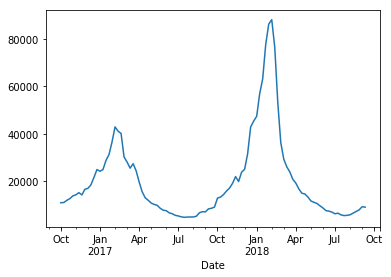

In [5]:
cdc_df.plot()
plt.legend().set_visible(False)
plt.show()

### Twitter Data

### Google Trends Data

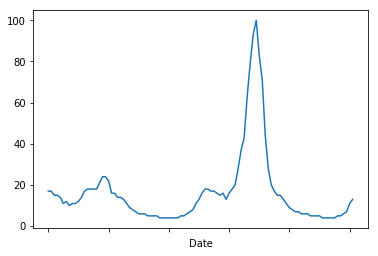

In [6]:
google_df.plot()
plt.legend().set_visible(False)
plt.show()

## Assessing Stationarity

In [7]:
#Plot rolling statistics
def check_stationarity(df,window,count):
    moving_avg = df.rolling(window).mean() #4 week lag
    moving_std = df.rolling(window).std()

    orig = plt.plot(df, color='blue',label='Original')
    mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
    std = plt.plot(moving_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(count, autolag='AIC')

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
#mean and standard deviation increasing with time = not stationary

### Dickey-Fuller Test

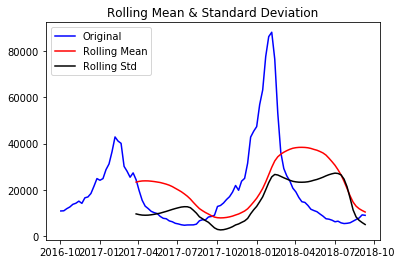

Results of Dickey-Fuller Test:
Test Statistic                 -2.843437
p-value                         0.052332
#Lags Used                      5.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


In [8]:
# Perform the dickey Fuller test 
cdc_df.dropna(inplace=True)
check_stationarity(cdc_df, 26, cdc_df['ILITOTAL'])
#null: time-series is non-stationary 
#p-value: 0.05
#p-value > 0.05, fail to reject null --> time-series is non-stationary at 95% confidence 

### Decomposition Visualization

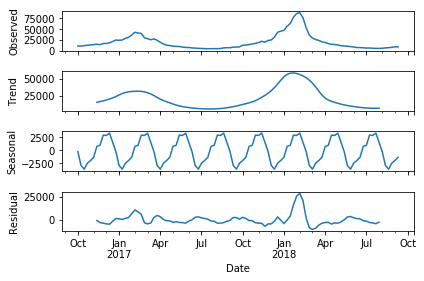

In [9]:
result = seasonal_decompose(cdc_df, freq=12) #every 4 weeks
result.plot()
plt.show()

## Stationarization of Data

### Seasonal Differencing

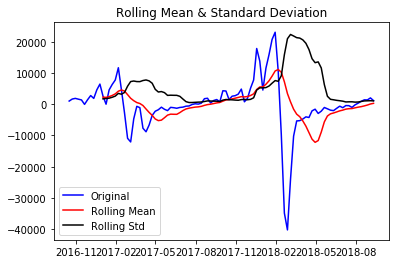

Results of Dickey-Fuller Test:
Test Statistic                 -2.834899
p-value                         0.053459
#Lags Used                      8.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


In [23]:
cdc_seasonal_diff= cdc_df - cdc_df.shift(12)
cdc_seasonal_diff.dropna(inplace=True)
check_stationarity(cdc_seasonal_diff, 12, cdc_seasonal_diff['ILITOTAL'])
#p-value: 0.002264 -- stationary data 

## ACF & PACF Visualizations

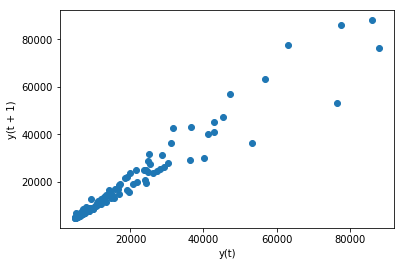

In [11]:
#plot the observation at the previous time step 
#(t-1) with the observation at the next time step (t+1) as a scatter plot.
#plots the visits(t) on the x-axis against 
#the visits on the previous day (t-1) on the y-axis.
lag_plot(cdc_df)
#clear correlation

### Pearson Correlation

In [12]:
# creates a lagged version of the dataset and calculates a 
#correlation matrix of each column with other columns, including itself.
values = cdc_df['ILITOTAL']
dataframe = concat([values.shift(2), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)
#strong positive correlation (0.89) between the observation and the lag=2 value.

          t-1       t+1
t-1  1.000000  0.892759
t+1  0.892759  1.000000


### Autocorrelation Plot

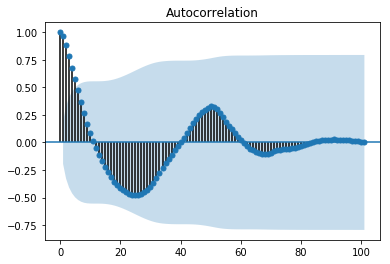

In [13]:
plot_acf(cdc_df)
plt.show()

### PACF Chart for Seasonal Differences

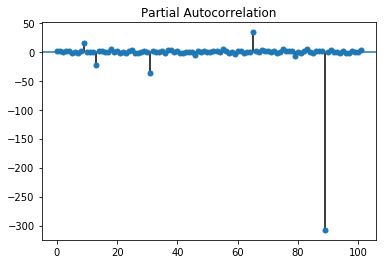

In [14]:
plot_pacf(cdc_df)
plt.show()

Use PACF for AR model diagnostics and ACF for MA model diagnostics

# ARIMA Modeling

## Seasonal ARIMA Model, CDC Data Only

### Hyperparameter Selection

In [ ]:
#https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/
#add grid search 
def sarimax_grid_search():
    # Define the p, d and q parameters to take any value between 0 and 2
    p = [0, 1, 2, 4, 6, 8, 10]
    d = range(0, 3)
    q = range(0, 3)
    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))
    # Generate all different combinations of seasonal p, q and q triplets
    pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(cdc_df['ILITOTAL'],
                                                order=comb,
                                                seasonal_order=combs)
                output = mod.fit()
                ans.append([comb, combs, output.aic])
            except:
                continue
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    return ans_df.loc[ans_df['aic'].idxmin()]

In [ ]:
sarimax_grid_search()

In [56]:
mod = sm.tsa.statespace.SARIMAX(cdc_seasonal_diff['ILITOTAL'], order=(1,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                           ILITOTAL   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -862.757
Date:                            Sun, 30 Sep 2018   AIC                           1733.513
Time:                                    12:58:34   BIC                           1743.377
Sample:                                10-17-2016   HQIC                          1737.485
                                     - 09-10-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4971      0.049     10.214      0.000       0.402       0.592
ar.S.L12       0.0457      0.129   

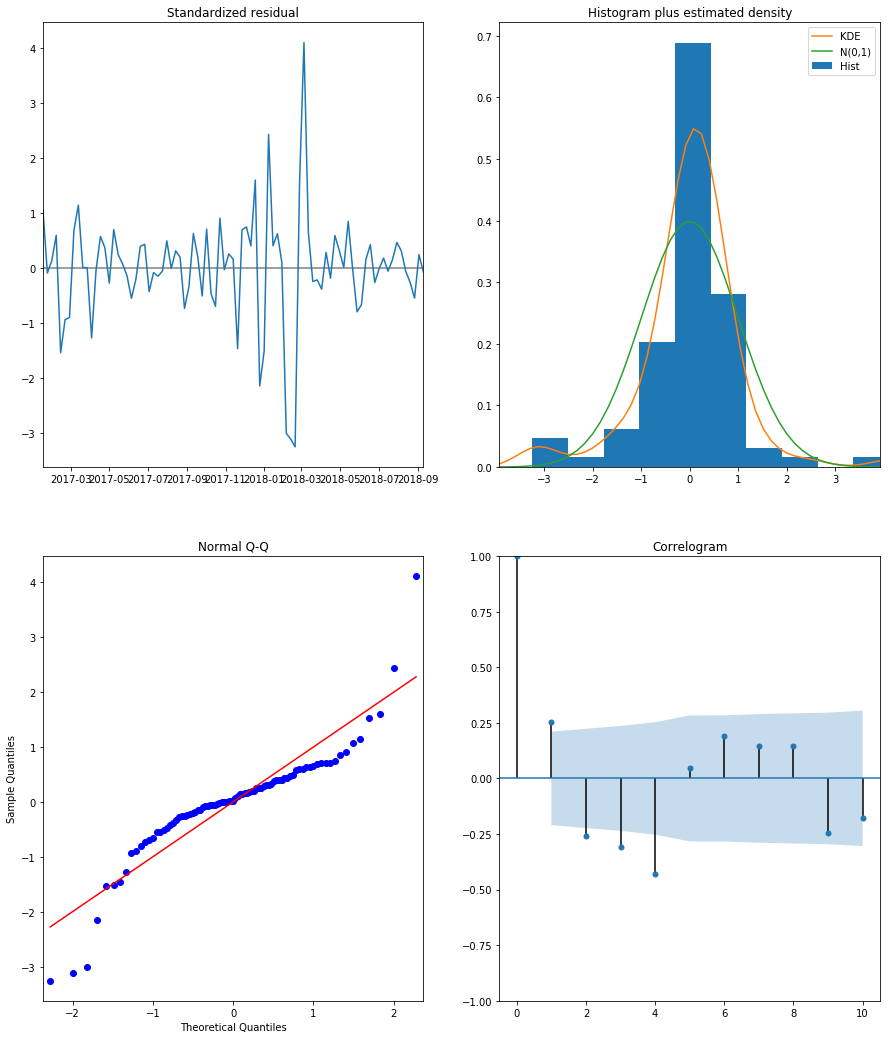

In [57]:
results.plot_diagnostics(figsize=(15, 18))
plt.show()

* KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
* The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

## Model Validation

### One-Step Ahead Forecasting
Compare predicted values to real values in the time series

In [58]:
def forecasting(results, dynamic=False):
    # get predictions 
    pred = results.get_prediction(start=pd.to_datetime('2017-01-02'), dynamic=dynamic)
    pred_conf = pred.conf_int()
    # Plot real vs predicted values along with confidence interval
    rcParams['figure.figsize'] = 15, 6

    #Plot observed values
    ax = cdc_df['2016':].plot(label='observed')
    #Plot predicted values
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)
    #Plot the range for confidence intervals
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='g', alpha=.5)
    #Set axes labels
    ax.set_xlabel('Date')
    ax.set_ylabel('ILI-visits')
    plt.legend()
    plt.show()
    # Get the Real and predicted values
    visits_forecasted = pred.predicted_mean
    visits_truth = cdc_df['2017-01-02':]['ILITOTAL']
    # Compute the mean square error
    mse = np.sqrt(((visits_forecasted - visits_truth) ** 2).mean())
    print('The Root Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

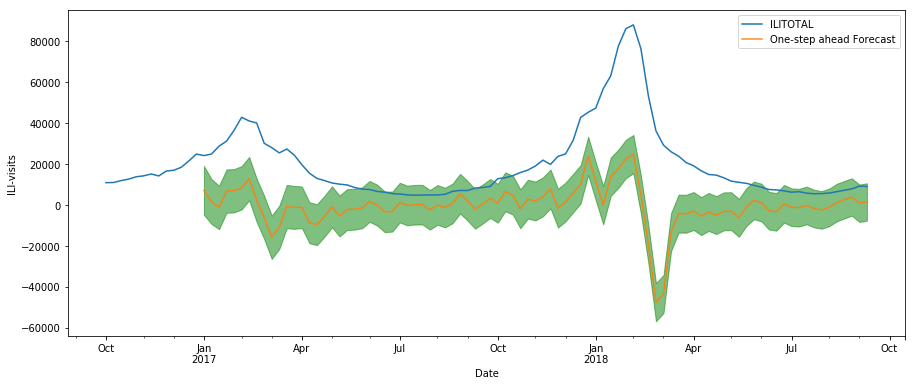

The Root Mean Squared Error of our forecasts is 27757.18


In [59]:
forecasting(results, dynamic=False)

### Dynamic Forecasting
Only use information from the time series up to a certain point, and after that, forecasts are generated using values from previous forecasted time points.

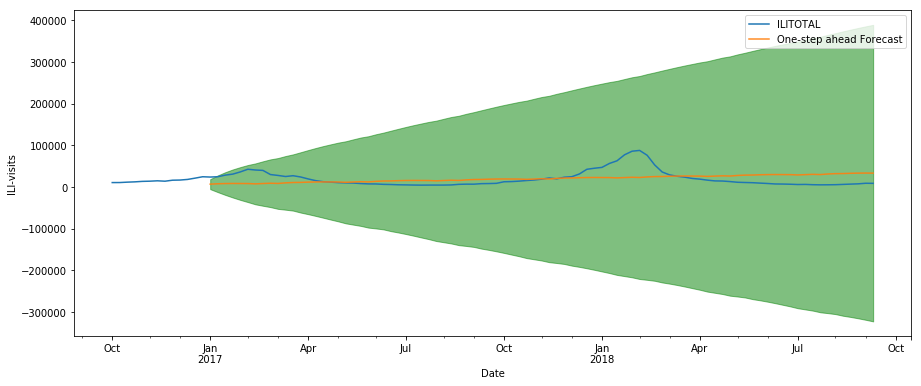

The Root Mean Squared Error of our forecasts is 20945.88


In [60]:
forecasting(results,dynamic=True)

In [39]:
def get_forecast(steps):
    # Get forecast 500 steps ahead in future
    prediction = results.get_forecast(steps=steps)
    # Get confidence intervals of forecasts
    pred_conf = prediction.conf_int()
    # Plot future predictions with confidence intervals
    ax = cdc_df.plot(label='observed', figsize=(20, 15))
    prediction.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('ILI visits')

    plt.legend()
    plt.show()

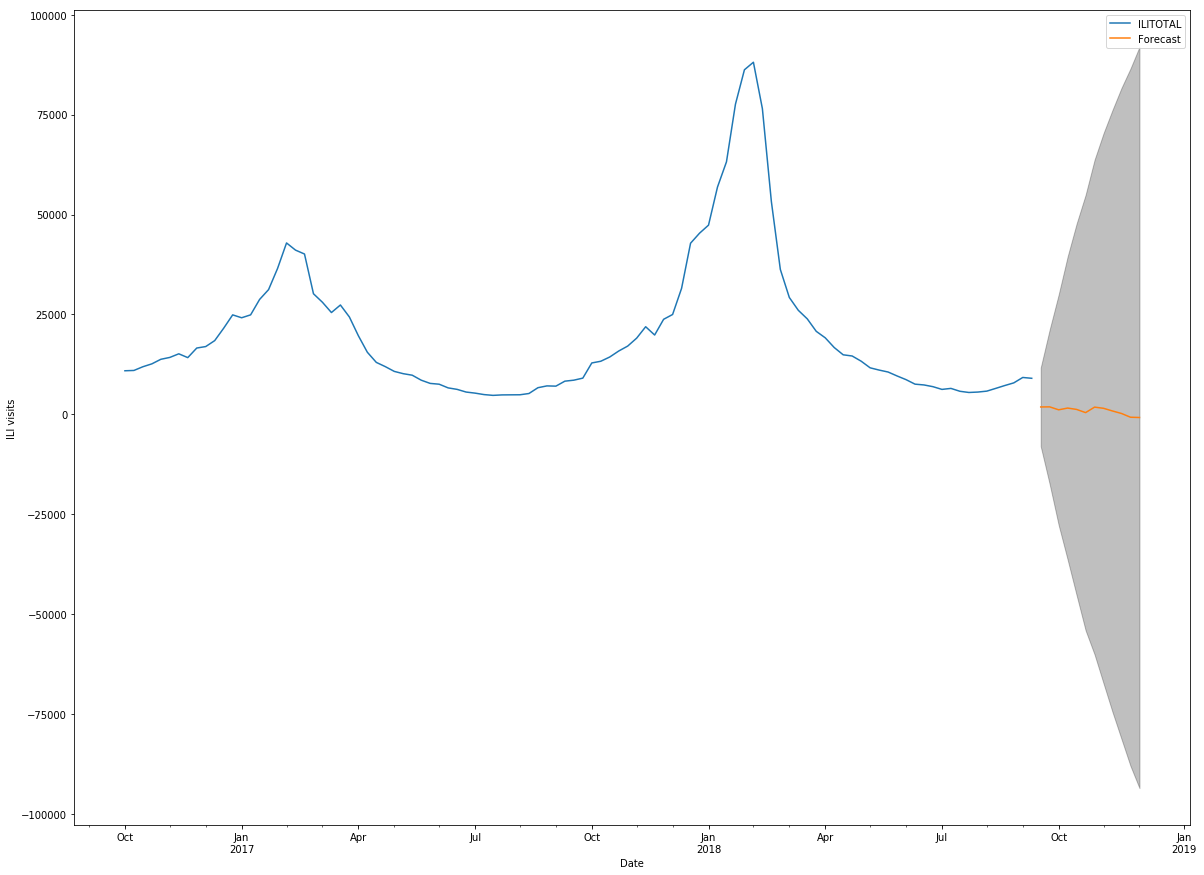

In [43]:
get_forecast(12)

# Next Steps:
* Time-series analysis with CDC, Twitter, and Google Trends data to assess which model is best at forecasting outbreaks, using CDC data as 'ground truth' and AIC as a metric
* Add more annotated tweets
* Doc2Vec & PCA
* Dashboard visualizations